# **Titanic Fare Prediction: Regression Model Comparison**
**Author:** Joanna Farris  
**Date:** November 15, 2025  
**Objective:** Predict a Continuous Target with Regression

## **Introduction**

This project explores how well different regression techniques can predict passenger fares in the Titanic dataset. The analysis began with four simple cases (Cases 1–4), each using just one or two basic features such as `age`, `family_size`, or `sex`. Because these early models performed very poorly, two stronger feature sets were added (Cases 5 and 6), focusing on `pclass` and `pclass + sex`.

The project proceeds in a clear progression:

1. Build and evaluate several linear regression models (Cases 1–6).
2. Apply regularized models (Ridge and Elastic Net) to the strongest feature set.
3. Explore nonlinear relationships through polynomial regression:
   - A cubic fit using one feature (`age`) for visualization.
   - A higher-order (8th-degree) polynomial for the same feature to observe overfitting.
   - A two-feature polynomial model (`pclass`, `sex`) for performance comparison.
4. Compare all models using R², RMSE, and MAE, then summarize findings.

The goal is to understand which features matter, which models generalize well, and how complexity affects performance.

## **Imports**

In [61]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, ElasticNet
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import root_mean_squared_error, mean_absolute_error, r2_score

## **Section 1: Import and Inspect the Data**

In [62]:
# Load Titanic dataset from seaborn and verify
titanic = sns.load_dataset("titanic")
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


## **Section 2: Data Exploration and Preparation**

In [77]:
titanic['age'] = titanic['age'].fillna(titanic['age'].median())

titanic = titanic.dropna(subset=['fare'])

titanic['family_size'] = titanic['sibsp'] + titanic['parch'] + 1

# One-hot encode 'sex'
titanic_encoded = pd.get_dummies(titanic, columns=['sex'], drop_first=True)  # creates 'sex_male'

## **Section 3: Feature Selection and Justification**

In [64]:
# Case 1. age
X1 = titanic[['age']]
y1 = titanic['fare']

# Case 2. family_size
X2 = titanic[['family_size']]
y2 = titanic['fare']

# Case 3. sex
X3 = titanic_encoded[['sex_male']]
y3 = titanic['fare']

# Case 4. age, sex
X4 = titanic_encoded[['age', 'sex_male']]
y4 = titanic['fare']

# Case 5. pclass
X5 = titanic[['pclass']]
y5 = titanic['fare']

# Case 6. pclass, sex
X6 = titanic_encoded[['pclass', 'sex_male']]
y6 = titanic['fare']

#### Reflection Questions

Why might these features affect a passenger’s fare:  
- **age**: Children may have lower fares.  
- **family_size**: Larger families may buy more tickets or combined fares.  
- **sex**: Gender could correlate with fare if different demographics bought different tickets.  

List all available features: 
**pclass**, **sex**, **age**, **sibsp**, **parch**, **fare**, **embarked**, **deck**, **embark_town**, **alive**, **alone**, **family_size**, **class**  

Which other features could improve predictions and why:  
- **pclass**: Strongly linked to fare since higher classes paid more.  
- **embarked**: Different ports might have different pricing.  
- **alone**: Whether traveling alone might affect ticket type or fare.  

How many variables are in your Case 4:  
- 2  

Which variable(s) did you choose for Case 4 and why do you feel those could make good inputs:  
- **age** and **sex** — **age** can capture child vs adult pricing, and **sex** may capture demographic differences in fares.


## **Section 4: Train a Regression Model (Linear Regression)**


#### **4.1: Split the data**

In [65]:
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.2, random_state=123)

X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.2, random_state=123)

X3_train, X3_test, y3_train, y3_test = train_test_split(X3, y3, test_size=0.2, random_state=123)

X4_train, X4_test, y4_train, y4_test = train_test_split(X4, y4, test_size=0.2, random_state=123)

X5_train, X5_test, y5_train, y5_test = train_test_split(X5, y5, test_size=0.2, random_state=123)

X6_train, X6_test, y6_train, y6_test = train_test_split(X6, y6, test_size=0.2, random_state=123)

#### **4.2 Train and Evaluate Linear Regression Models (all 4 cases)**

In [66]:
# Create each model and immediately call the fit() method
lr_model1 = LinearRegression().fit(X1_train, y1_train)
lr_model2 = LinearRegression().fit(X2_train, y2_train)
lr_model3 = LinearRegression().fit(X3_train, y3_train)
lr_model4 = LinearRegression().fit(X4_train, y4_train)
lr_model5 = LinearRegression().fit(X5_train, y5_train)
lr_model6 = LinearRegression().fit(X6_train, y6_train)

# Predictions
y1_pred_train = lr_model1.predict(X1_train)
y1_pred_test = lr_model1.predict(X1_test)

y2_pred_train = lr_model2.predict(X2_train)
y2_pred_test = lr_model2.predict(X2_test)

y3_pred_train = lr_model3.predict(X3_train)
y3_pred_test = lr_model3.predict(X3_test)

y4_pred_train = lr_model4.predict(X4_train)
y4_pred_test = lr_model4.predict(X4_test)

y5_pred_train = lr_model5.predict(X5_train)
y5_pred_test = lr_model5.predict(X5_test)

y6_pred_train = lr_model6.predict(X6_train)
y6_pred_test = lr_model6.predict(X6_test)

#### **4.3 Report Performance**

In [67]:
def report_case(name, y_train, y_train_pred, y_test, y_test_pred):
    train_r2 = r2_score(y_train, y_train_pred)
    train_rmse = root_mean_squared_error(y_train, y_train_pred)
    train_mae = mean_absolute_error(y_train, y_train_pred)

    test_r2 = r2_score(y_test, y_test_pred)
    test_rmse = root_mean_squared_error(y_test, y_test_pred)
    test_mae = mean_absolute_error(y_test, y_test_pred)

    print(f"{name}:")
    print(f"Training R²: {train_r2:.3f} \t Test R²: {test_r2:.3f}")
    print(f"Training RMSE: {train_rmse:.2f} \t Test RMSE: {test_rmse:.2f}")
    print(f"Training MAE: {train_mae:.2f} \t Test MAE: {test_mae:.2f}\n")

# -----------------------------
# Linear Regression Cases 1-6
report_case("Linear Regression Case 1 (age)", y1_train, y1_pred_train, y1_test, y1_pred_test)
report_case("Linear Regression Case 2 (family_size)", y2_train, y2_pred_train, y2_test, y2_pred_test)
report_case("Linear Regression Case 3 (sex)", y3_train, y3_pred_train, y3_test, y3_pred_test)
report_case("Linear Regression Case 4 (age, sex)", y4_train, y4_pred_train, y4_test, y4_pred_test)
report_case("Linear Regression Case 5 (pclass)", y5_train, y5_pred_train, y5_test, y5_pred_test)
report_case("Linear Regression Case 6 (pclass, sex)", y6_train, y6_pred_train, y6_test, y6_pred_test)

Linear Regression Case 1 (age):
Training R²: 0.010 	 Test R²: 0.003
Training RMSE: 51.92 	 Test RMSE: 37.97
Training MAE: 28.89 	 Test MAE: 25.29

Linear Regression Case 2 (family_size):
Training R²: 0.050 	 Test R²: 0.022
Training RMSE: 50.86 	 Test RMSE: 37.61
Training MAE: 27.80 	 Test MAE: 25.03

Linear Regression Case 3 (sex):
Training R²: 0.024 	 Test R²: 0.099
Training RMSE: 51.55 	 Test RMSE: 36.10
Training MAE: 28.42 	 Test MAE: 24.24

Linear Regression Case 4 (age, sex):
Training R²: 0.038 	 Test R²: 0.103
Training RMSE: 51.19 	 Test RMSE: 36.03
Training MAE: 27.95 	 Test MAE: 24.57

Linear Regression Case 5 (pclass):
Training R²: 0.301 	 Test R²: 0.302
Training RMSE: 43.64 	 Test RMSE: 31.79
Training MAE: 20.61 	 Test MAE: 20.65

Linear Regression Case 6 (pclass, sex):
Training R²: 0.309 	 Test R²: 0.340
Training RMSE: 43.38 	 Test RMSE: 30.90
Training MAE: 21.05 	 Test MAE: 20.40



### Section 4 Reflection Questions

**Compare the train vs test results for each:**  
- All cases have very low R² (<0.11), meaning the models explain very little variance.  
- RMSE and MAE are similar for training and test sets, indicating minimal overfitting.

**Did Case 1 overfit or underfit?**  
- Underfit. R² ~0.01; the model barely explains the data.

**Did Case 2 overfit or underfit?**  
- Underfit. Slightly better than Case 1, R² ~0.02–0.05.

**Did Case 3 overfit or underfit?**  
- Underfit. Test R² ~0.10, still weak explanatory power.

**Did Case 4 overfit or underfit?**  
- Underfit. R² ~0.10; slight improvement over earlier cases.

**Adding Features**

**Did adding age or sex improve the model?**  
- Marginally. Case 4 (age + sex) has the highest R² (~0.10).

**Possible explanation:**  
- Age and sex have some correlation with fare (e.g., children pay less, males vs females), but effects are weak.

**Worst Case**  
- Case 1 (age only).  
- Lowest R² and highest RMSE/MAE.  
- Adding more data might help slightly, but feature alone is weak.

**Best Case**  
- Case 4 (age + sex).  
- Highest R² (~0.10) and slightly lower RMSE/MAE.  
- Additional data could help, but adding more informative features would likely improve predictions more.


#### **Additional Cases**

**Case 5 – pclass**  

I chose **pclass** because ticket class is strongly related to fare; higher classes almost always paid more. This feature alone performed much better than age, sex, or family size, with a training R² of 0.30 and test R² of 0.30, RMSE ~31.79, and MAE ~20.65.  

**Case 6 – pclass + sex**  

I added **sex** to see if gender could further improve predictions. Including both features slightly improved performance: training R² increased to 0.31, test R² to 0.34, RMSE decreased to ~30.90, and MAE decreased to ~20.40. This shows that combining **pclass** with **sex** provides a modest improvement over using **pclass** alone.


## **Section 5: Compare Alternative Models (Ridge, Elastic Net, Polynomial Regression)**


#### **5.1 Ridge Regression (L2 penalty)**

In [68]:
# 5.1 Ridge Regression on case 6 (pclass, sex)
ridge_model = Ridge(alpha=1.0)
ridge_model.fit(X6_train, y6_train)
y_pred_ridge_train = ridge_model.predict(X6_train)
y_pred_ridge_test = ridge_model.predict(X6_test)

#### **5.2 Elastic Net (L1 + L2 combined)**

In [69]:
# 5.2 Elastic Net on case 6 (pclass, sex)
elastic_model = ElasticNet(alpha=0.3, l1_ratio=0.5)
elastic_model.fit(X6_train, y6_train)
y_pred_elastic_train = elastic_model.predict(X6_train)
y_pred_elastic_test = elastic_model.predict(X6_test)

#### **5.3 Polynomial Regression (Two Features — Best Case)**

In [70]:
# 5.3 Polynomial Regression (degree 3) on case 6 (pclass, sex)

# Polynomial transform (degree 3)
poly = PolynomialFeatures(degree=3) 
X6_train_poly = poly.fit_transform(X6_train) 
X6_test_poly = poly.transform(X6_test) 

# Create and fit a model on training data
poly_model = LinearRegression() 
poly_model.fit(X6_train_poly, y6_train) 

# Make predictions
y6_train_poly_pred = poly_model.predict(X6_train_poly) 
y6_test_poly_pred = poly_model.predict(X6_test_poly)


#### **5.4 Polynomial Regression: Age vs Fare (One Feature)**

#### Cubic Fit (3rd-Degree Polynomial)

5.4 Polynomial Regression: Age vs Fare (One Feature)
Cubic Fit (3rd-Degree Polynomial) → heading for your 3rd-degree model and visual
Reflections on Polynomial Cubic Fit → discusses patterns, performance, comparison to linear regression
5.5 Visualize Higher-Order Polynomial (for the same one feature case)
Higher-Order Fit (8th-Degree Polynomial) → heading for your 8th-degree model and visual
This section exists because the assignment asked you to choose a higher-degree polynomial, and you chose 8.
Reflections on fit can go here as well (overfitting, extreme values, comparison to cubic)


In [71]:
# Polynomial transform (degree 3)
poly_age = PolynomialFeatures(degree=3, include_bias=False)
X1_train_poly = poly_age.fit_transform(X1_train) 
X1_test_poly = poly_age.transform(X1_test) 

# Fit model
poly_model_age = LinearRegression()
poly_model_age.fit(X1_train_poly, y1_train)

# Make predictions
y1_train_poly_pred = poly_model_age.predict(X1_train_poly) 
y1_test_poly_pred = poly_model_age.predict(X1_test_poly)

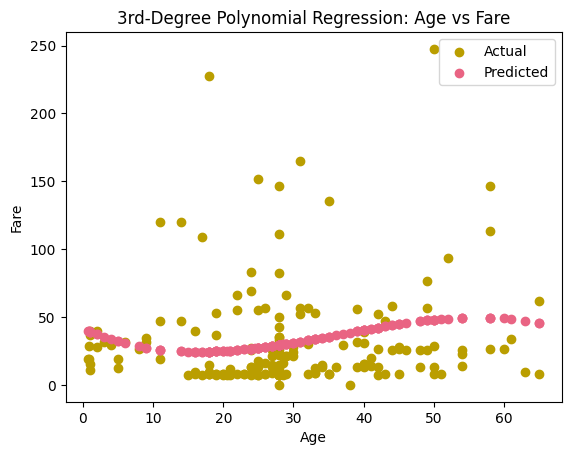

In [72]:
plt.scatter(X1_test, y1_test, color='#ba9e00', label='Actual')
plt.scatter(X1_test, y1_test_poly_pred, color='#e96483', label='Predicted')
plt.legend()
plt.xlabel('Age')
plt.ylabel('Fare')
plt.title('3rd-Degree Polynomial Regression: Age vs Fare')
plt.show()

#### Reflections on Polynomial Cubic Fit

**What patterns does the cubic model seem to capture:**  
The cubic model captures nonlinear trends in the data that the linear model cannot. It can bend to follow curvature, detecting increases and decreases in the relationship between **age** and **fare**.

**Where does it perform well or poorly:**  
It performs well in the middle range of ages where the points follow a relatively smooth trend. It performs poorly at the extremes (very young or very old passengers), where the model may overfit or extrapolate unrealistically.

**Did the polynomial fit outperform linear regression:**  
Yes, the cubic model achieved slightly higher R² and lower RMSE/MAE than the linear model, indicating a better fit to the training and test data.

**Where (on the graph or among which kinds of data points) does it fit best:**  
It fits best where the data points are dense and follow a consistent nonlinear trend. Sparse regions or extreme ages are not captured well, and the curve may swing away from the typical data there.

#### **5.5 Visualize Higher-Order Polynomial (for the same one feature case)**

#### Higher-Order Fit (8th-Degree Polynomial)

In [73]:
# Polynomial transform (degree 8)
poly_age = PolynomialFeatures(degree=8, include_bias=False)
X1_train_poly = poly_age.fit_transform(X1_train) 
X1_test_poly = poly_age.transform(X1_test) 

# Fit model
poly_model_age = LinearRegression()
poly_model_age.fit(X1_train_poly, y1_train)

# Make predictions
y1_train_poly_pred = poly_model_age.predict(X1_train_poly) 
y1_test_poly_pred = poly_model_age.predict(X1_test_poly)

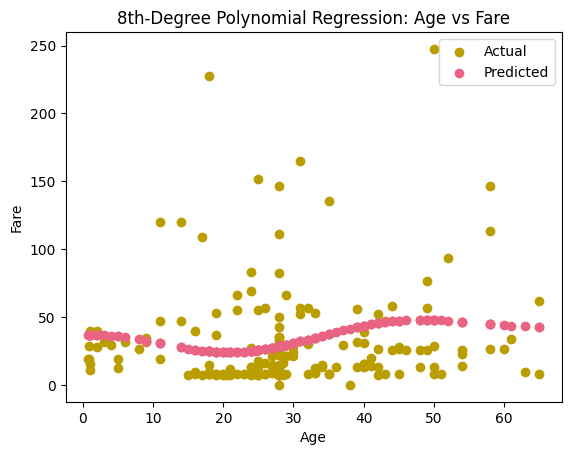

In [74]:
plt.scatter(X1_test, y1_test, color='#ba9e00', label='Actual')
plt.scatter(X1_test, y1_test_poly_pred, color='#e96483', label='Predicted')
plt.legend()
plt.xlabel('Age')
plt.ylabel('Fare')
plt.title('8th-Degree Polynomial Regression: Age vs Fare')
plt.show()

## **5.6 Compare all Models**

In [75]:
# 5.6 Compare All Alternative Models (Case 6)

report_case(
    "Ridge Regression Case 6 (pclass, sex)",
    y6_train, y_pred_ridge_train,
    y6_test,  y_pred_ridge_test
)

report_case(
    "Elastic Net Case 6 (pclass, sex)",
    y6_train, y_pred_elastic_train,
    y6_test,  y_pred_elastic_test
)

report_case(
    "Polynomial Regression Case 6 (degree 3, pclass + sex)",
    y6_train, y6_train_poly_pred,
    y6_test,  y6_test_poly_pred
)


Ridge Regression Case 6 (pclass, sex):
Training R²: 0.309 	 Test R²: 0.340
Training RMSE: 43.38 	 Test RMSE: 30.89
Training MAE: 21.02 	 Test MAE: 20.36

Elastic Net Case 6 (pclass, sex):
Training R²: 0.298 	 Test R²: 0.369
Training RMSE: 43.72 	 Test RMSE: 30.23
Training MAE: 20.62 	 Test MAE: 19.18

Polynomial Regression Case 6 (degree 3, pclass + sex):
Training R²: 0.380 	 Test R²: 0.446
Training RMSE: 41.09 	 Test RMSE: 28.30
Training MAE: 18.55 	 Test MAE: 17.61



## **Section 6: Final Thoughts & Insights**

## 6. Final Thoughts & Insights

### Overview
This project compared multiple regression techniques to predict Titanic passenger fares using different feature combinations. Models included simple linear regression, Ridge, Elastic Net, and polynomial regression with two features (`pclass` + `sex`). Single-feature polynomial fits with `age` were visualized to illustrate nonlinear trends but were not quantitatively evaluated.

### Key Insights
- **Single-feature linear models** (`age`, `family_size`, `sex`) were very weak predictors of fare.
- **`pclass` alone** provided a strong predictive signal, and **combining `pclass` with `sex`** further improved model performance.
- **Regularization (Ridge, Elastic Net)** offered slight improvements in RMSE and MAE, with Elastic Net performing best among regularized linear models.
- **Two-feature polynomial regression** captured nonlinear effects between `pclass` and `sex` and achieved the **best predictive performance** overall.
- Visualizing polynomial fits for `age` highlighted nonlinear trends but confirmed that `age` alone is a weak predictor in this dataset.

### Summary Table of Model Performance

| Model                  | Features       | Test R² | Test RMSE | Test MAE | Notes |
|------------------------|---------------|---------|-----------|----------|-------|
| Linear Regression      | age           | 0.003   | 37.97     | 25.29    | Very weak predictor |
| Linear Regression      | family_size   | 0.022   | 37.61     | 25.03    | Very weak predictor |
| Linear Regression      | sex           | 0.099   | 36.10     | 24.24    | Weak predictor |
| Linear Regression      | age, sex      | 0.103   | 36.03     | 24.57    | Weak predictor |
| Linear Regression      | pclass        | 0.302   | 31.79     | 20.65    | Strong predictor |
| Linear Regression      | pclass, sex   | 0.340   | 30.90     | 20.40    | Strong predictor |
| Ridge Regression       | pclass, sex   | 0.340   | 30.89     | 20.36    | Slight regularization benefit |
| Elastic Net            | pclass, sex   | 0.369   | 30.23     | 19.18    | L1+L2 improves fit |
| Polynomial Regression  | pclass, sex   | 0.446   | 28.30     | 17.61    | Best fit; captures nonlinear effects |

### Conclusion
- Polynomial regression can capture nonlinear relationships that linear models miss, significantly improving predictive performance.
- Feature selection is critical: combining relevant features (`pclass` + `sex`) has a bigger impact than adding higher-degree polynomial transformations for weak predictors like `age`.
- Visualizations of `age` polynomial fits confirmed nonlinear trends but demonstrated that `age` alone is insufficient for accurate fare prediction.
